<a href="https://colab.research.google.com/github/denismembrive/Defunciones_Argentina/blob/main/Problema24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Cargamos el dataset
df_defunciones= pd.read_csv('/content/sample_data/arg_def_m_15_22.csv')

In [6]:
#Se muestran los ultimos datos de la tabla con la funcion Tail
df_defunciones.tail(5)

,region,jurisdiccion,mes_anio_defuncion,mes_def,anio_def,sexo_id,sexo_nombre,grupo_etario,grupo_causa_defuncion_CIE10,cod_causa_muerte_CIE10,cantidad
1969269,1.Centro,6.Prov. Bs.As.,05/2021,5,2021,9,desconocido,06.de 70 a 79 anios,0900 ENF DEL SISTEMA CIRCULATORIO,I50,2
1969270,2.NEA.,18.Corrientes.,08/2020,8,2020,9,desconocido,06.de 70 a 79 anios,0900 ENF DEL SISTEMA CIRCULATORIO,I10,1
1969271,1.Centro,6.Prov. Bs.As.,04/2021,4,2021,9,desconocido,06.de 70 a 79 anios,0900 ENF DEL SISTEMA CIRCULATORIO,I50,1
1969272,2.NEA.,18.Corrientes.,07/2020,7,2020,9,desconocido,06.de 70 a 79 anios,1200 ENF DEL HIGADO,K74,1
1969273,1.Centro,6.Prov. Bs.As.,11/2021,11,2021,9,desconocido,07. de 80 anios y mas,0900 ENF DEL SISTEMA CIRCULATORIO,I50,1


In [7]:
#Mostramos cantidad de filas y columnas del dataset
df_defunciones.shape

(1969274, 11)

Trabajaremos con casi 2 millones de datos, repartidos en 11 columnas. Es por esto que se analizara la cantidad de defunciones con respecto a los años. Es por esto que filtre los datos en dos columnas o variables.

In [8]:
#Se filtra el datast
df_filtrado = df_defunciones[['anio_def', 'cantidad']]

In [9]:
#Se imprimen los datos del dataset filtrado
print(df_filtrado.tail())


         anio_def  cantidad
1969269      2021         2
1969270      2020         1
1969271      2021         1
1969272      2020         1
1969273      2021         1


Ahora se procede a otener solo la sumatoria de defunciones de cada año, quedando asi nuestro data set conformado por 2 columnas y 8 filas

In [10]:
# Obtencion del total de defunciones por año (suma de todas las defunciones por año)
df_totales = df_filtrado.groupby('anio_def', as_index=False)['cantidad'].sum()



In [11]:
#Se comprueba que el dataset quedo con esa estructura
df_totales.shape

(8, 2)

Todo este analisis proximo sera desarrollado en excel y Geogebra, pero de todas maneras lo dejare realizado aqui tambien

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


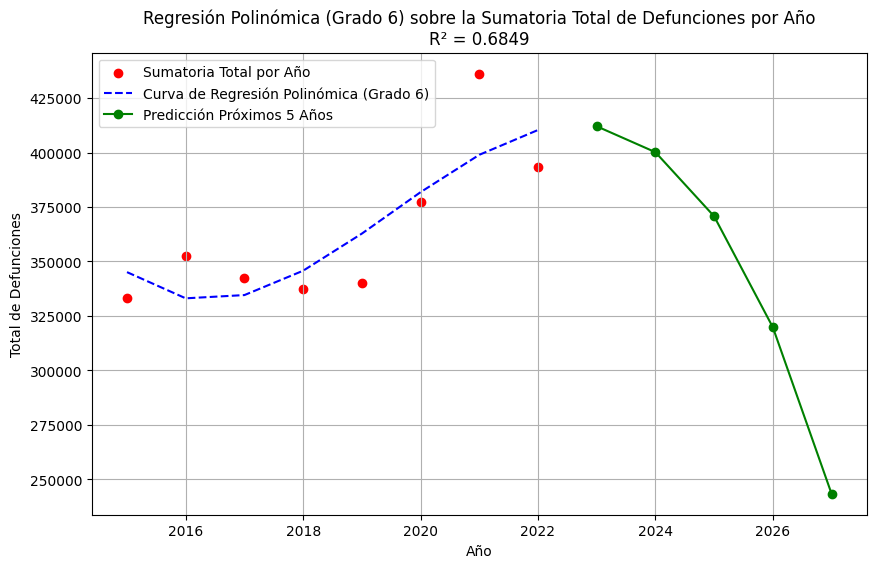

R²: 0.6849
Predicción para el año 2023: 412033 defunciones
Predicción para el año 2024: 400148 defunciones
Predicción para el año 2025: 370732 defunciones
Predicción para el año 2026: 319826 defunciones
Predicción para el año 2027: 243457 defunciones
Coeficientes del modelo polinómico:
[ 0.00000000e+00 -1.07847354e-04 -1.76339238e-07 -2.67065502e-04
 -2.39587326e-01  1.89818873e-04 -3.91635887e-08]
Intercepto: 265669786854.72


In [12]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Se agrupan los datos por año y se obtiene la sumatoria total de defunciones
df_sum = df_defunciones.groupby('anio_def')['cantidad'].sum().reset_index()

# Definicion de variables para la regresión (Usando la sumatoria total)
X = df_sum[['anio_def']]  # Años (Variable independiente)
y = df_sum['cantidad']    # Cantidad total de defunciones por año (Variable dependiente)

# Transformacion de los datos para regresión polinómica (Grado 6)
poly = PolynomialFeatures(degree=6)
X_poly = poly.fit_transform(X)

# Entrenamiento  del modelo de regresión polinómica
modelo = LinearRegression()
modelo.fit(X_poly, y)

# Prediccion de valores para la curva de tendencia
y_pred = modelo.predict(X_poly)

# Calculo del coeficiente de determinación R2
r2 = r2_score(y, y_pred)

# Prediccion de los próximos 5 años
anios_futuros = np.array(range(df_sum['anio_def'].max() + 1, df_sum['anio_def'].max() + 6)).reshape(-1, 1)
X_futuro_poly = poly.transform(anios_futuros)
predicciones = modelo.predict(X_futuro_poly)

# Grafico de los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label="Sumatoria Total por Año")  # Puntos originales
plt.plot(X, y_pred, color='blue', linestyle="--", label="Curva de Regresión Polinómica (Grado 6)")  # Línea de tendencia
plt.plot(anios_futuros, predicciones, color='green', marker='o', linestyle="-", label="Predicción Próximos 5 Años")  # Predicciones futuras

# Personalizamos el grafico
plt.xlabel("Año")
plt.ylabel("Total de Defunciones")
plt.title(f"Regresión Polinómica (Grado 6) sobre la Sumatoria Total de Defunciones por Año\nR² = {r2:.4f}")
plt.legend()
plt.grid(True)

# Mostrar gráfico
plt.show()

# Imprimir el coeficiente R2 para evaluar la regresión
print(f"R²: {r2:.4f}")

# Imprimir predicciones futuras
for año, pred in zip(anios_futuros.flatten(), predicciones):
    print(f"Predicción para el año {año}: {pred:.0f} defunciones")

# Mostrar coeficientes del modelo
print("Coeficientes del modelo polinómico:")
print(modelo.coef_)
print(f"Intercepto: {modelo.intercept_:.2f}")


In [13]:
# Se guardanlos datos en un archivo Excel
df_totales.to_excel("total_defunciones_por_anio.xlsx", index=False)

print("Archivo guardado como 'total_defunciones_por_anio.xlsx'.")

Archivo guardado como 'total_defunciones_por_anio.xlsx'.
